In [1]:
import glob 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

In [4]:
!kaggle datasets download -d gauravduttakiit/extreme-weather-temperature-prediction

100% 648k/648k [00:00<00:00, 1.07MB/s]
100% 648k/648k [00:00<00:00, 1.07MB/s]


In [5]:
!ls

drive  extreme-weather-temperature-prediction.zip  sample_data


In [6]:
!unzip extreme-weather-temperature-prediction.zip

Archive:  extreme-weather-temperature-prediction.zip
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [7]:
import pandas as pd
import numpy as np 


In [8]:
df_train = pd.read_csv('/content/train_dataset.csv')

In [9]:
df_train.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


In [10]:
df_train.shape

(6589, 22)

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isna().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

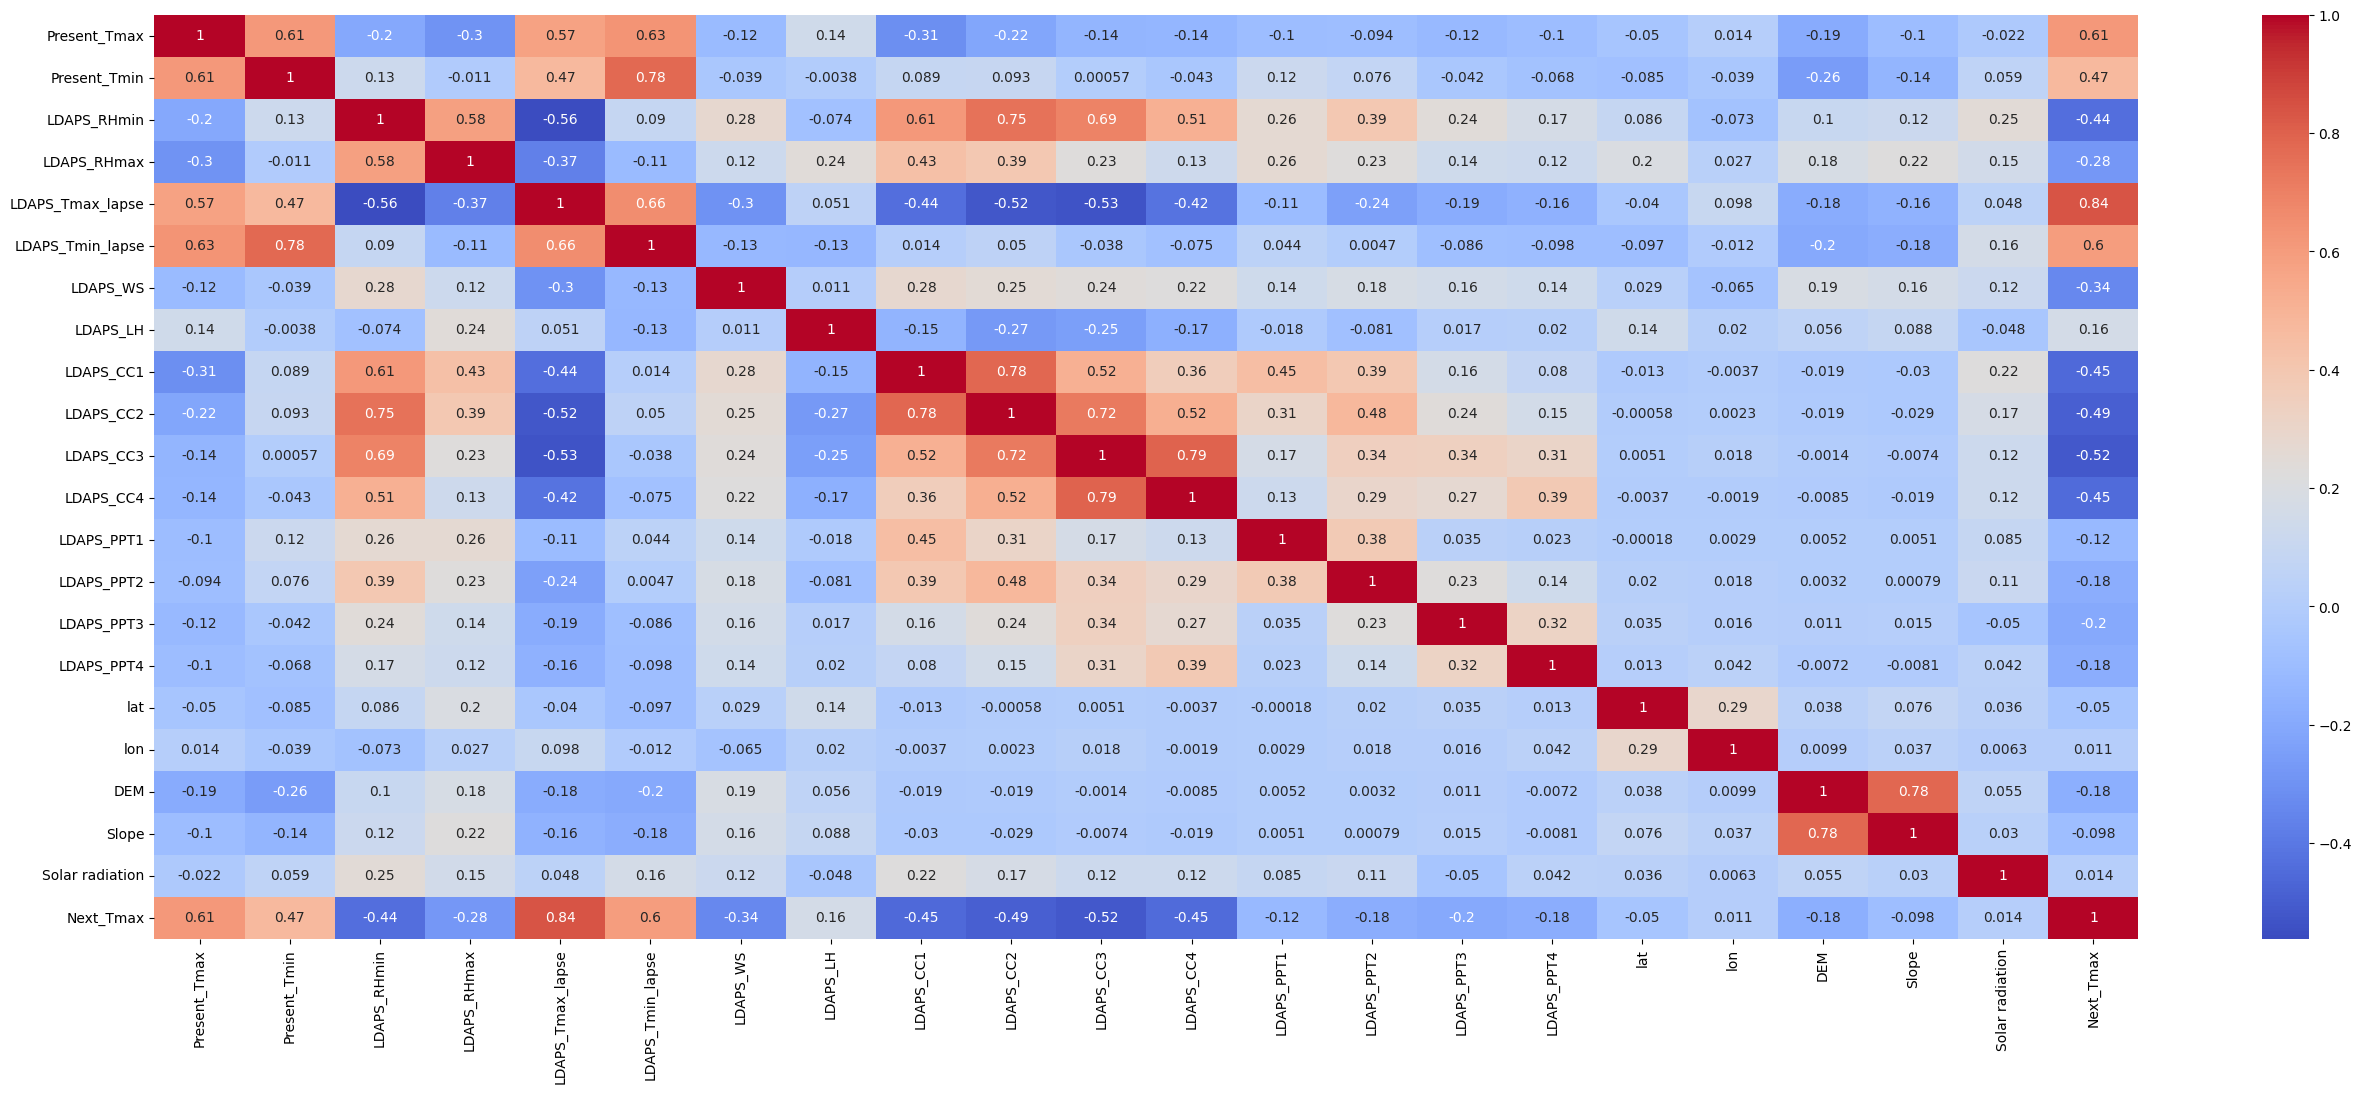

In [14]:
plt.figure(figsize=(32,12))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show() 

In [18]:
X = df_train.drop('Next_Tmax' ,axis='columns')
y = df_train['Next_Tmax']

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.4,random_state=42,shuffle=True)

In [21]:
X_train.shape

(2580, 21)

In [22]:
y_train.shape


(2580,)

In [23]:
scalar= MinMaxScaler()

In [24]:
X_train_scaled= scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [25]:
X_train_scaled


array([[3.92045455e-01, 5.05376344e-01, 2.37117365e-01, ...,
        1.92839747e-01, 6.18190002e-02, 1.55837518e-01],
       [4.54545455e-01, 5.16129032e-01, 4.36537045e-01, ...,
        0.00000000e+00, 5.00024076e-06, 1.14084952e-01],
       [7.50000000e-01, 8.33333333e-01, 3.35801554e-01, ...,
        2.00775136e-01, 2.88286597e-01, 3.76222519e-01],
       ...,
       [5.05681818e-01, 6.55913978e-01, 3.32313384e-01, ...,
        0.00000000e+00, 5.00024076e-06, 2.49449817e-01],
       [6.19318182e-01, 6.55913978e-01, 2.79913986e-01, ...,
        8.83974696e-02, 1.48968866e-01, 9.09266238e-01],
       [4.09090909e-01, 6.93548387e-01, 4.18184117e-01, ...,
        2.05541970e-01, 1.17825634e-01, 7.51576722e-01]])

**Now we define our Neural Net And Predict our Tmax **

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(21,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [28]:
from keras.callbacks import ModelCheckpoint 
checkpoint =ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [29]:
Batch_size=16
Epochs = 200
history = model.fit(X_train_scaled,y_train,batch_size=Batch_size, epochs=Epochs,validation_data=(X_test_scaled,y_test),callbacks=[checkpoint])

Epoch 1/200
162/162 [==============================] - ETA: 0s - loss: 444.9416 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 164.69530, saving model to best_weights.h5
162/162 [==============================] - 4s 9ms/step - loss: 444.9416 - accuracy: 0.0000e+00 - val_loss: 164.6953 - val_accuracy: 0.0000e+00
Epoch 2/200
142/162 [=========================>....] - ETA: 0s - loss: 34.2993 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 164.69530 to 41.97707, saving model to best_weights.h5
162/162 [==============================] - 1s 5ms/step - loss: 33.7911 - accuracy: 0.0000e+00 - val_loss: 41.9771 - val_accuracy: 0.0000e+00
Epoch 3/200
156/162 [===========================>..] - ETA: 0s - loss: 26.1158 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 41.97707 to 8.59132, saving model to best_weights.h5
162/162 [==============================] - 1s 7ms/step - loss: 26.1783 - accuracy: 0.0000e+00 - val_loss: 8.5913 - val_accuracy: 0.0000e+00
Epoch 4/200
152

In [32]:
model.save_weights('best_weights.h5')
model.load_weights('best_weights.h5')


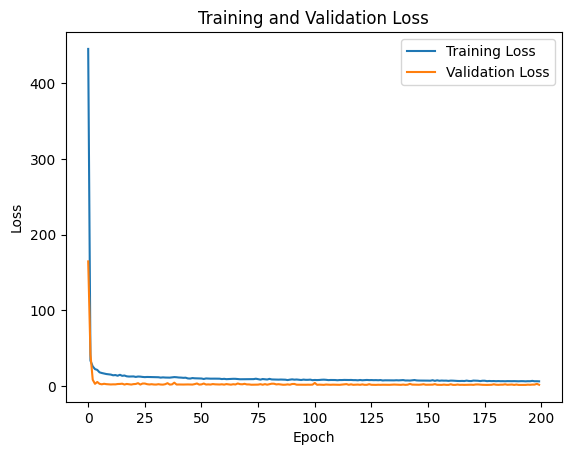

In [33]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
test_loss  = model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)



121/121 [==============================] - 0s 3ms/step - loss: 1.9595 - accuracy: 0.0000e+00
Test loss: [1.9594640731811523, 0.0]


In [41]:
X_test_scaled[0]

array([4.41860465e-01, 6.06557377e-01, 6.26119032e-01, 8.55156235e-01,
       5.73547072e-01, 7.20582824e-01, 1.99264547e-01, 2.36781549e-01,
       7.29825395e-01, 7.43675981e-01, 2.69948499e-01, 2.89332685e-01,
       1.47564467e-01, 2.73777734e-01, 3.12846694e-04, 0.00000000e+00,
       5.00529661e-01, 5.24271845e-01, 5.98844798e-01, 9.73679548e-02,
       6.96679548e-01])

In [54]:
sample = X_test_scaled[4]


# reshape the sample to match the input shape of the model
sample = np.reshape(sample, (1, 21))

# make a prediction for the sample
prediction = model.predict(sample)

# print the prediction
print('Prediction:', prediction)


1/1 [==============================] - 0s 76ms/step
Prediction: [[30.960978]]


In [36]:
yhat

array([[30.429457],
       [33.708458],
       [29.158545],
       ...,
       [29.378405],
       [31.400858],
       [29.611181]], dtype=float32)

In [39]:
y_test

1766    33.3
3023    35.5
4857    29.4
6485    35.0
4899    32.0
        ... 
5613    28.4
2583    25.3
1231    30.0
5303    31.4
186     30.8
Name: Next_Tmax, Length: 3870, dtype: float64